# Partie 2

### Définition de $\phi$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def phi(x, y, L):
    if x==0 or x==L:
        return 1
    if y==0 or y==L:
        return 0


### Simulation de la chaîne de Markov

In [2]:
def markov_edge(x,y,L,alpha):
    beta = (1-alpha)/4
    while (x!=0 and x!=L and y!=0 and y!=L):
        alea = random.random()
        if 0 <=alea <=alpha:
            return 0
        else:
            if alpha <=alea <= alpha + beta:
                x = x-1
            if alpha +beta <= alea <= alpha +2*beta:
                x = x+1
            if alpha +2*beta <= alea <= alpha +3*beta:
                y= y-1
            if alpha +3*beta <= alea <= alpha +4*beta:
                y= y+1
    return phi(x,y,L)

### Calcul de $u(x,y)$

In [3]:
def monte_carlo(x,y,L,alpha,N):
    s = 0
    for n in range(N):
        s=s + markov_edge(x,y,L,alpha)
    return s/N

### Approximation de $f$

In [4]:
def approximate(L,alpha,N):
    expected_values =np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            expected_values[i][j]=monte_carlo(i,j,L,alpha,N)
    return expected_values

### Visualisation de $f$

In [5]:
def plot(L,alpha,N):
    plt.imshow(approximate(L, alpha, N).T, origin="lower",extent=[0, 1, 0, 1], cmap="jet")
    plt.show()

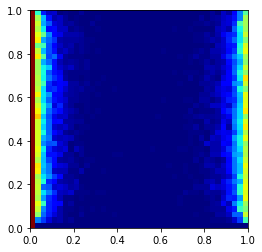

In [6]:
L = 40
N = 100
gamma = 100
alpha = gamma/L**2
plot(L,alpha,N)